# Neural Networks. Regression. Part 1

---

## Neural Networks: building, training


Applied Mathematical Modeling in Banking

---

У цій лекції ми скористаємося набором даних Boston: вартість житла у пригородах Бостона

# 1. Dataset description

In [ ]:
install.packages("MASS")

`medv` is TARGET!

In [1]:
library(MASS)
?Boston

Boston {MASS},R Documentation


Переглянемо дані:

In [5]:
head(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [6]:
str(Boston)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


# 2. Data visualization

Lets move our dataset to special variable:

In [7]:
data <- Boston
head(data)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


Let's check a correlation between parameters: 

corrplot 0.89 loaded



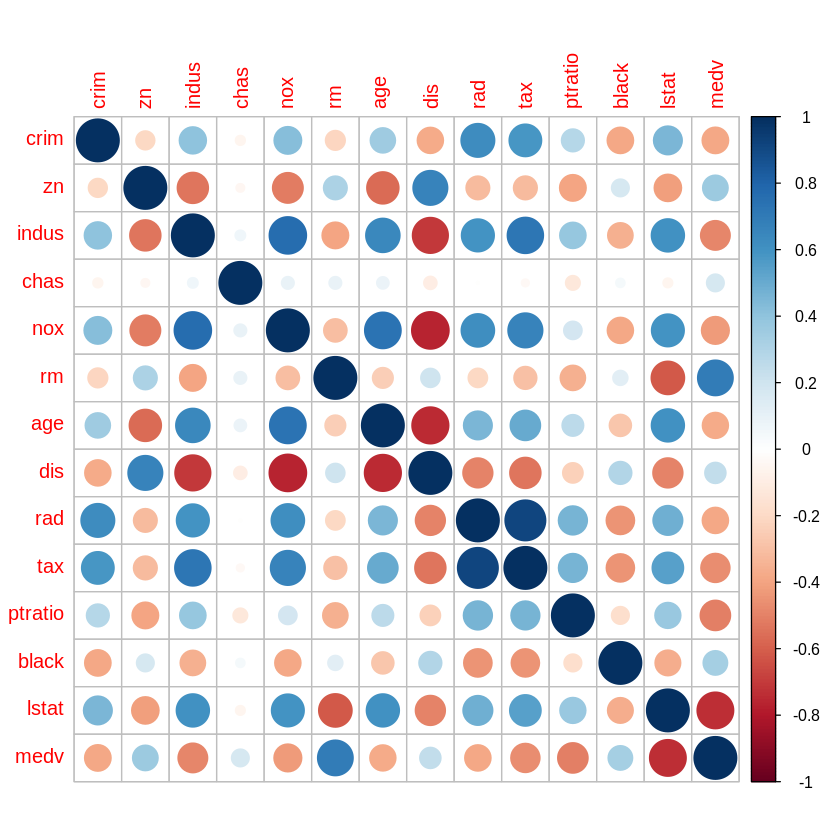

In [8]:
library(corrplot)
corrplot(cor(data))

Rad and tax has highest correlation: 0.91

- [x] `rad` - index of accessibility to radial highways.
- [x] `tax` - full-value property-tax rate per $10,000.

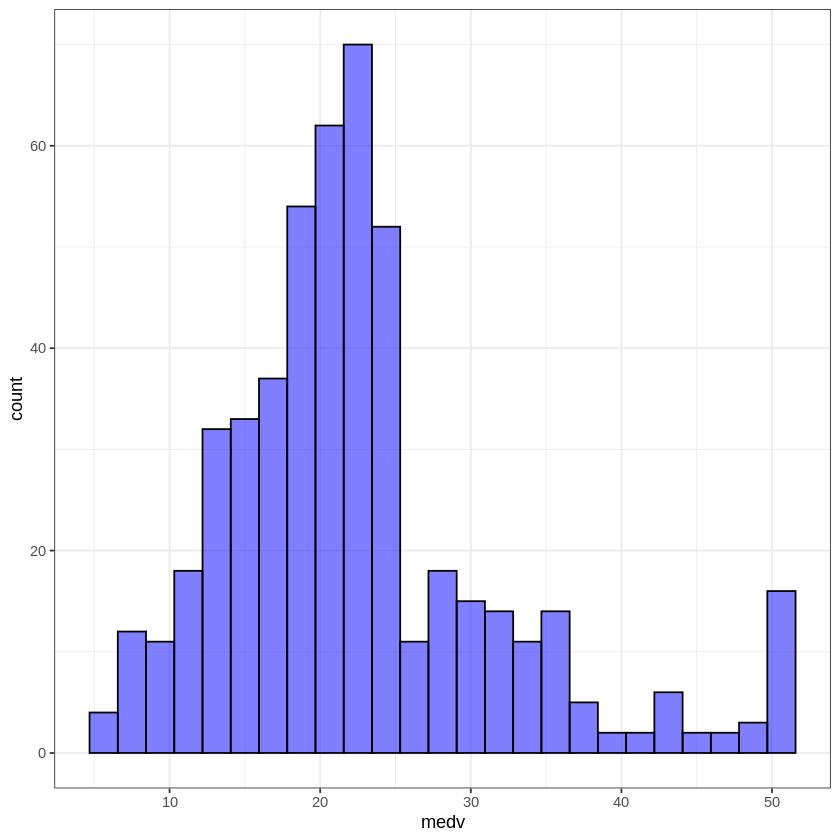

In [12]:
library(ggplot2)

ggplot(data, aes(medv)) + 
    geom_histogram(bins = 25, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

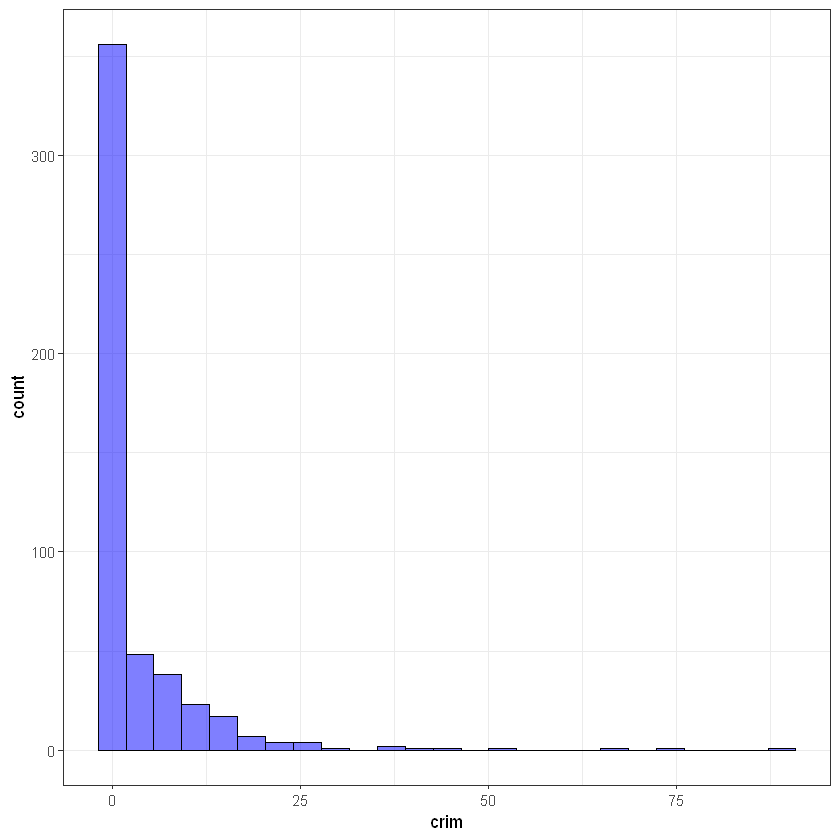

In [28]:
#crim
ggplot(data, aes(crim)) + 
    geom_histogram(bins = 25, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

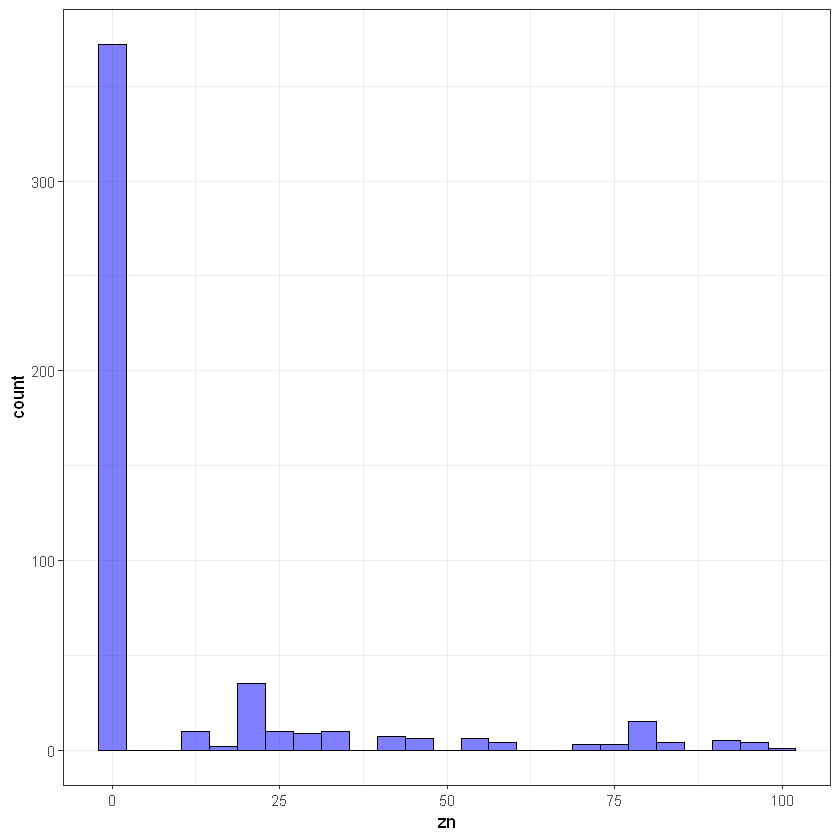

In [44]:
#zn
ggplot(data, aes(zn)) + 
    geom_histogram(bins = 25, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

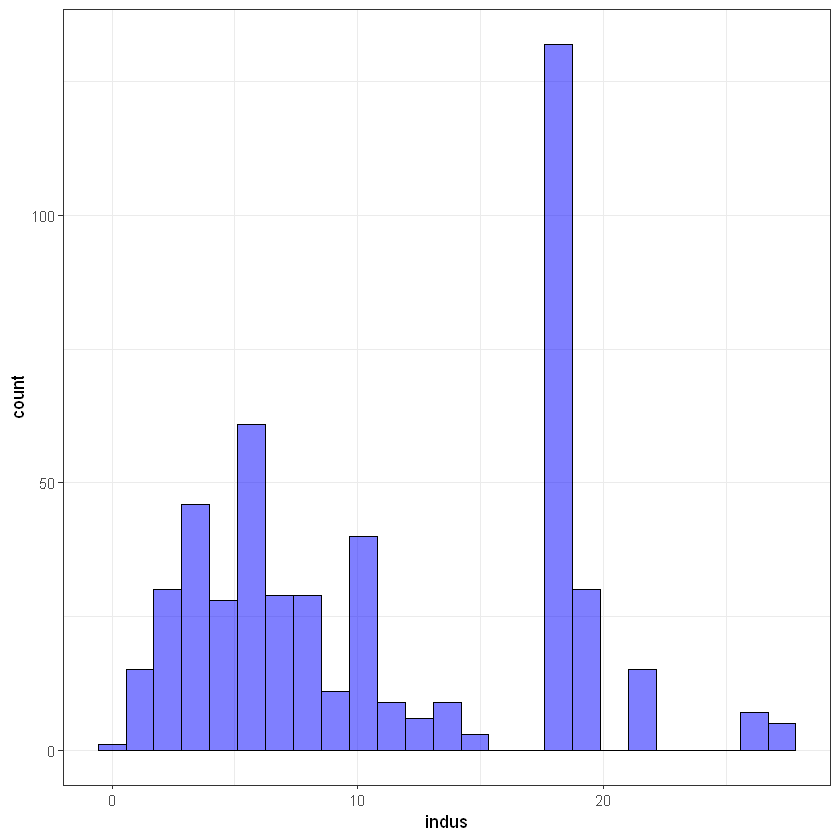

In [46]:
#indus
ggplot(data, aes(indus)) + 
    geom_histogram(bins = 25, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

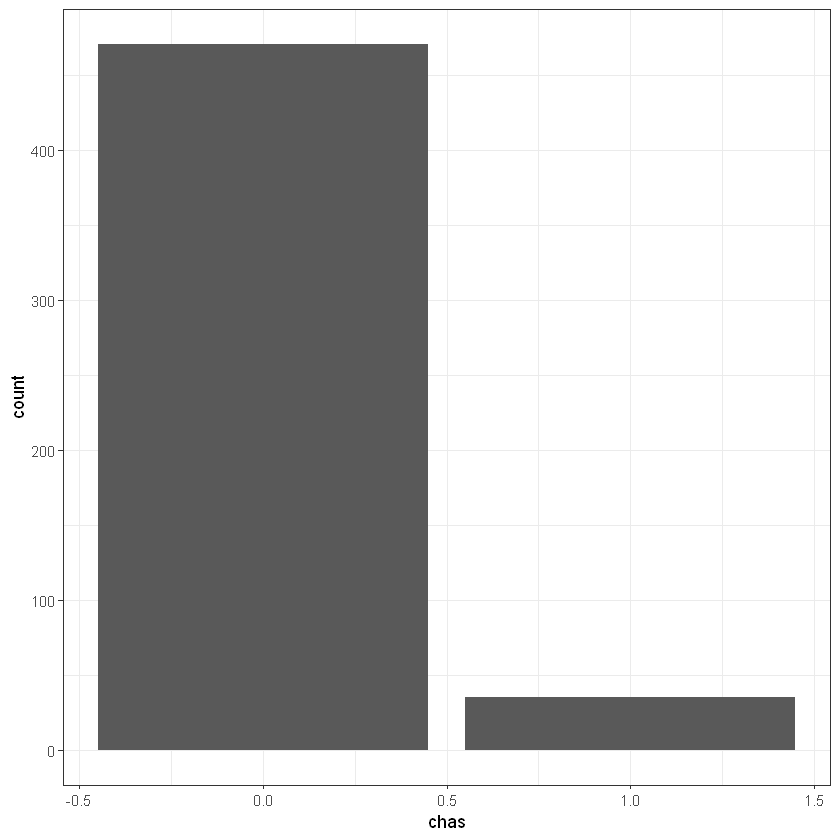

In [52]:
#chas 
ggplot(data, aes(chas)) + 
    geom_bar(aes(fill = chas)) + 
    theme_bw()

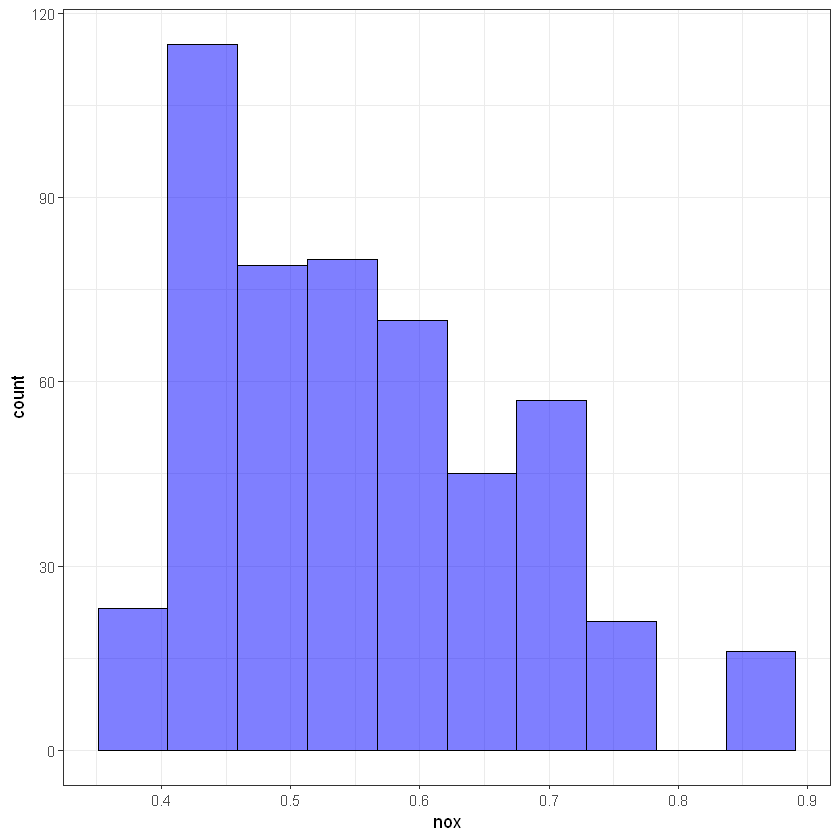

In [56]:
# nox
ggplot(data, aes(nox)) + 
    geom_histogram(bins = 10, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

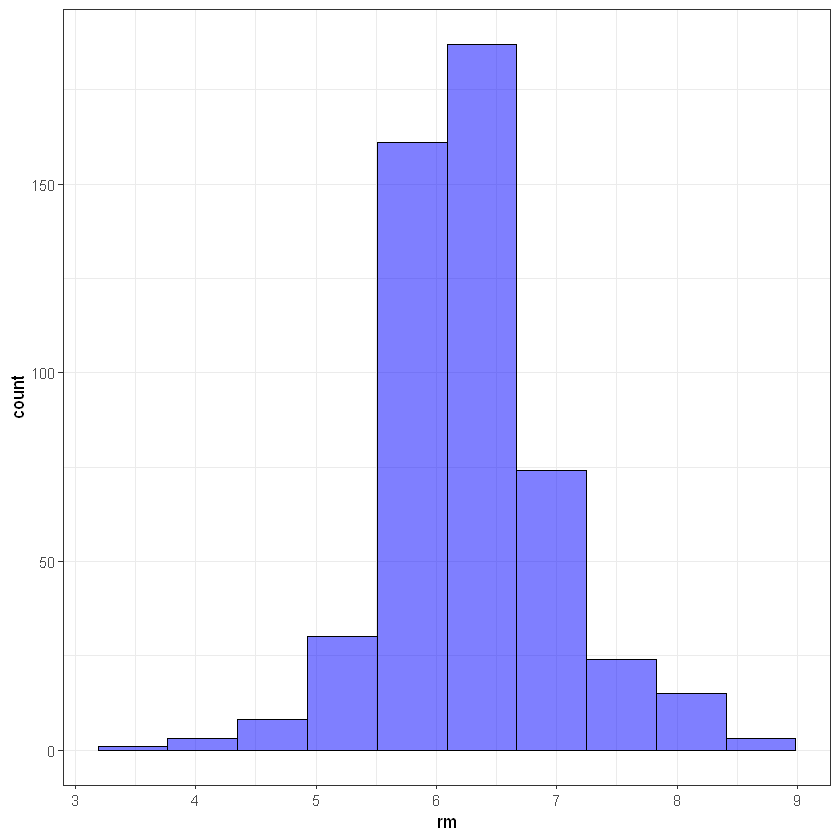

In [58]:
# rm
ggplot(data, aes(rm)) + 
    geom_histogram(bins = 10, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

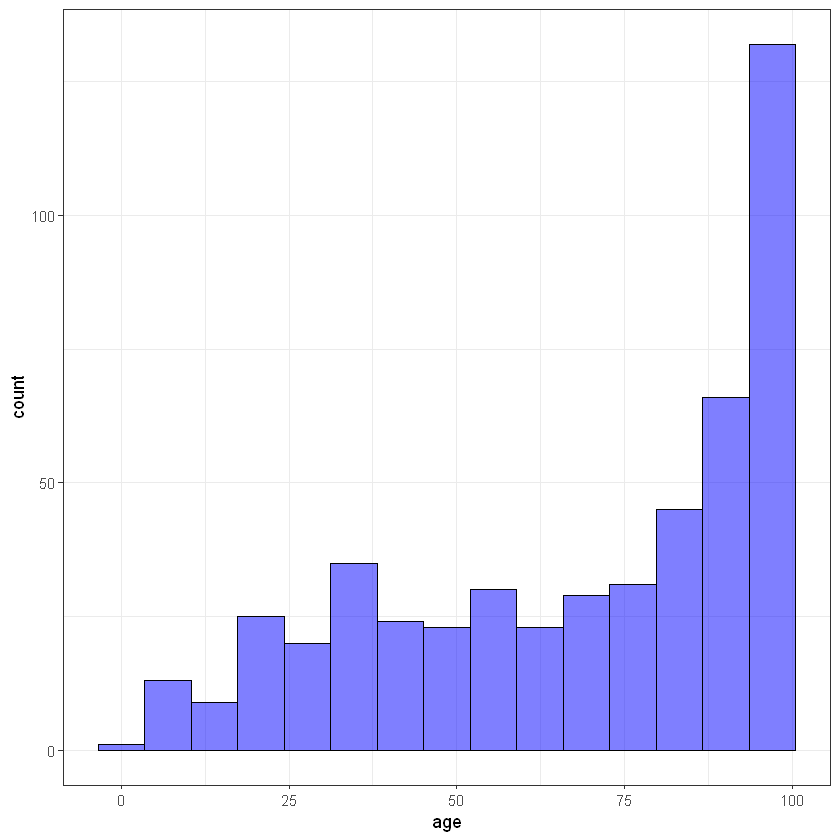

In [59]:
# age
ggplot(data, aes(age)) + 
    geom_histogram(bins = 15, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

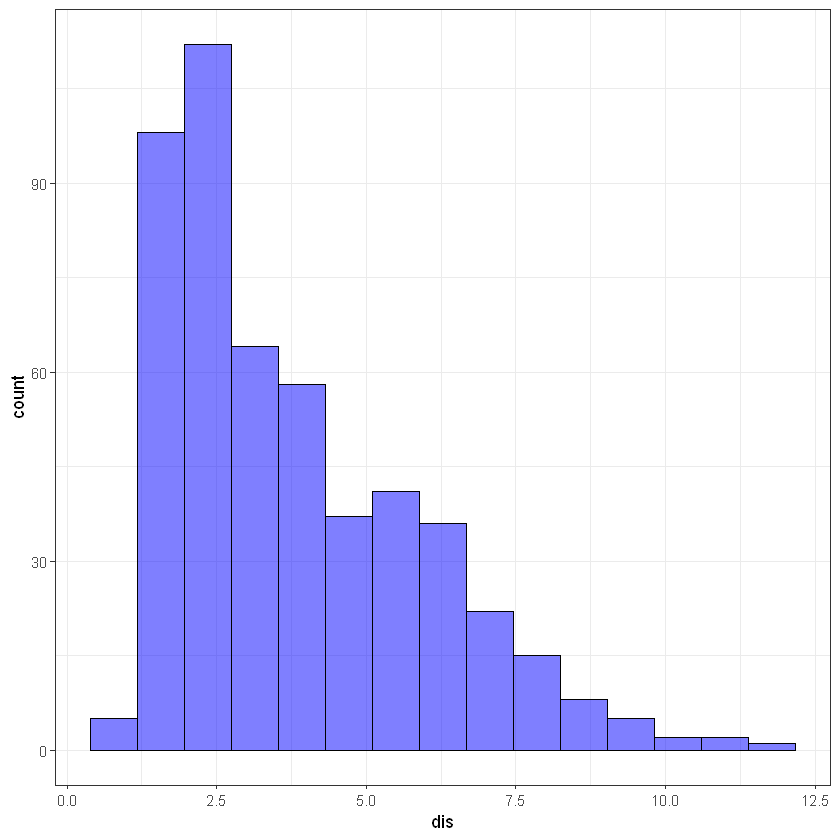

In [61]:
# dis
ggplot(data, aes(dis)) + 
    geom_histogram(bins = 15, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

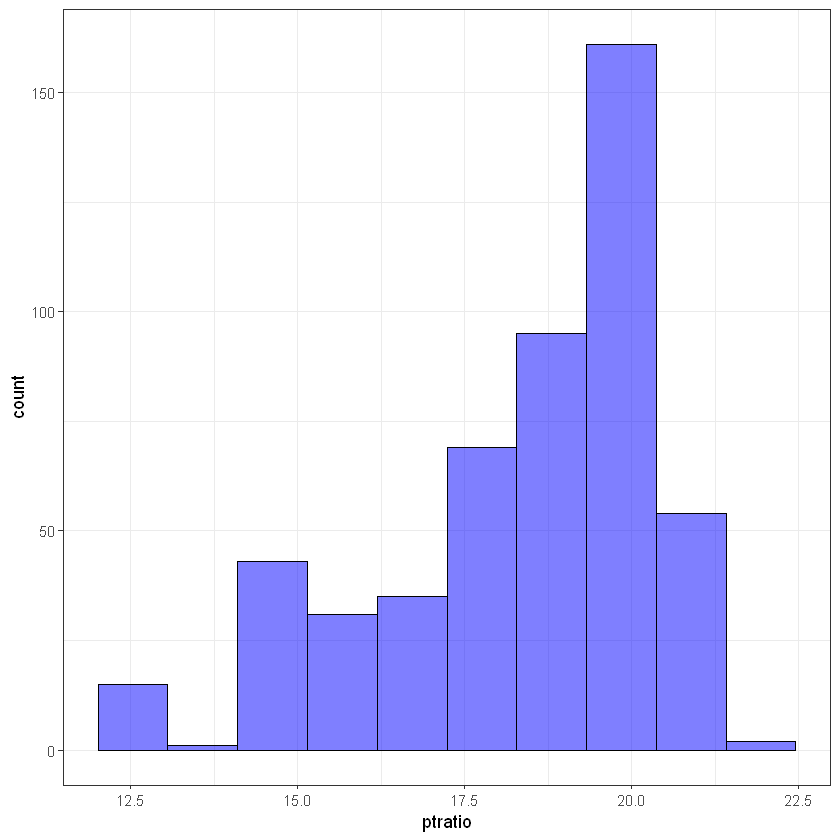

In [68]:
#rad
ggplot(data, aes(ptratio)) + 
    geom_histogram(bins = 10, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

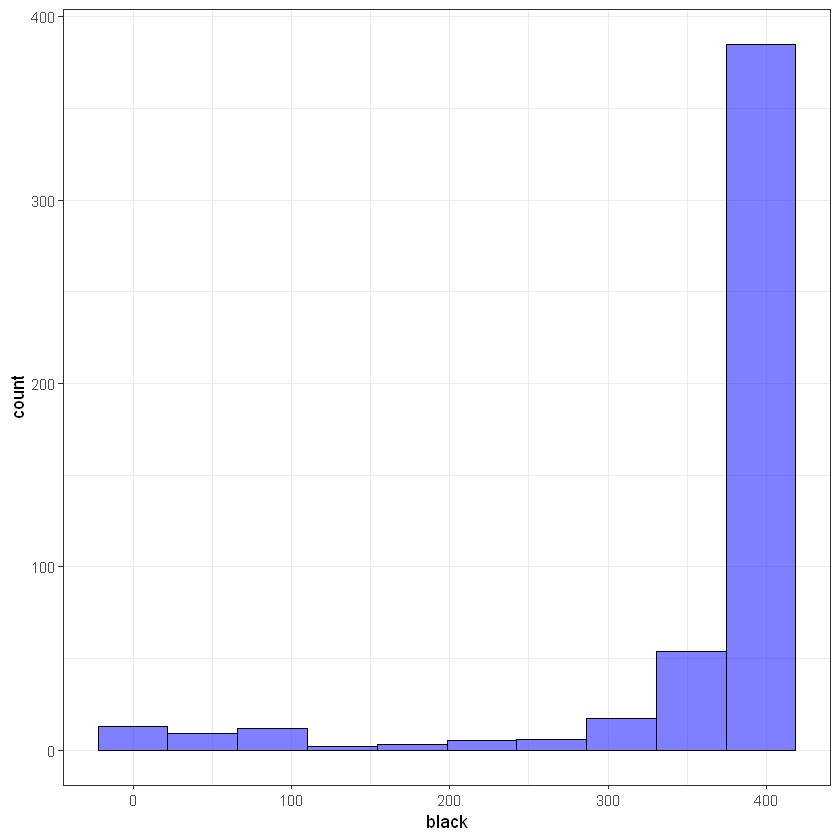

In [71]:
# black
ggplot(data, aes(black)) + 
    geom_histogram(bins = 10, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

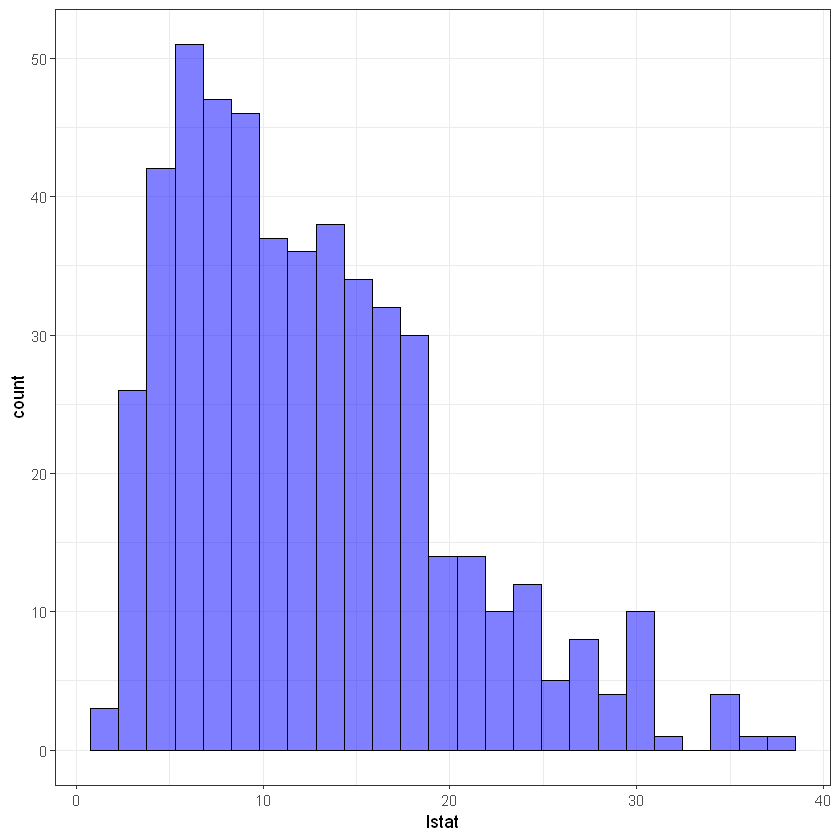

In [73]:
# lstat
ggplot(data, aes(lstat)) + 
    geom_histogram(bins = 25, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

In [ ]:
# nox
ggplot(data, aes(nox)) + 
    geom_histogram(bins = 25, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

---

# 3. Data scaling

Для роботи з нейромережами хорошою практикою є нормалізація даних перед використанням. Скористаємося формулою $(X-Xmin)/(Xmax-Xmin)$.

Визначимо мінімальні та максимальні значення по факторах:

In [9]:
library(dplyr)


Attaching package: ‘dplyr’


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [10]:
normalizeData <- function(x) {
    return ((x - min(x)) / (max(x) - min(x)))
}

In [11]:
scaled_data <- sapply(X = data, FUN = normalizeData) %>% as.data.frame() 
scaled_data %>% head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.0000000000,0.18,0.06781525,0,0.3148148,0.5775053,0.6416066,0.2692031,0.00000000,0.20801527,0.2872340,1.0000000,0.08967991,0.4222222
2,0.0002359225,0.00,0.24230205,0,0.1728395,0.5479977,0.7826982,0.3489620,0.04347826,0.10496183,0.5531915,1.0000000,0.20447020,0.3688889
3,0.0002356977,0.00,0.24230205,0,0.1728395,0.6943859,0.5993821,0.3489620,0.04347826,0.10496183,0.5531915,0.9897373,0.06346578,0.6600000
4,0.0002927957,0.00,0.06304985,0,0.1502058,0.6585553,0.4418126,0.4485446,0.08695652,0.06679389,0.6489362,0.9942761,0.03338852,0.6311111
5,0.0007050701,0.00,0.06304985,0,0.1502058,0.6871048,0.5283213,0.4485446,0.08695652,0.06679389,0.6489362,1.0000000,0.09933775,0.6933333
6,0.0002644715,0.00,0.06304985,0,0.1502058,0.5497222,0.5746653,0.4485446,0.08695652,0.06679389,0.6489362,0.9929901,0.09602649,0.5266667


Нормалізуємо значення за один раз у всьому датафреймі:

Переглянемо як змінився вигляд значень:

---

# 4. Train/test split

Сформуємо вибірки з пропорцією 70/30 % значень:

In [12]:
library(caTools)
set.seed(111)
split <- sample.split(scaled_data$medv, SplitRatio = 0.7)
train_data <- subset(scaled_data, split)
test_data <- subset(scaled_data, !split)

Let's check how target's are distrubuted in both samples:

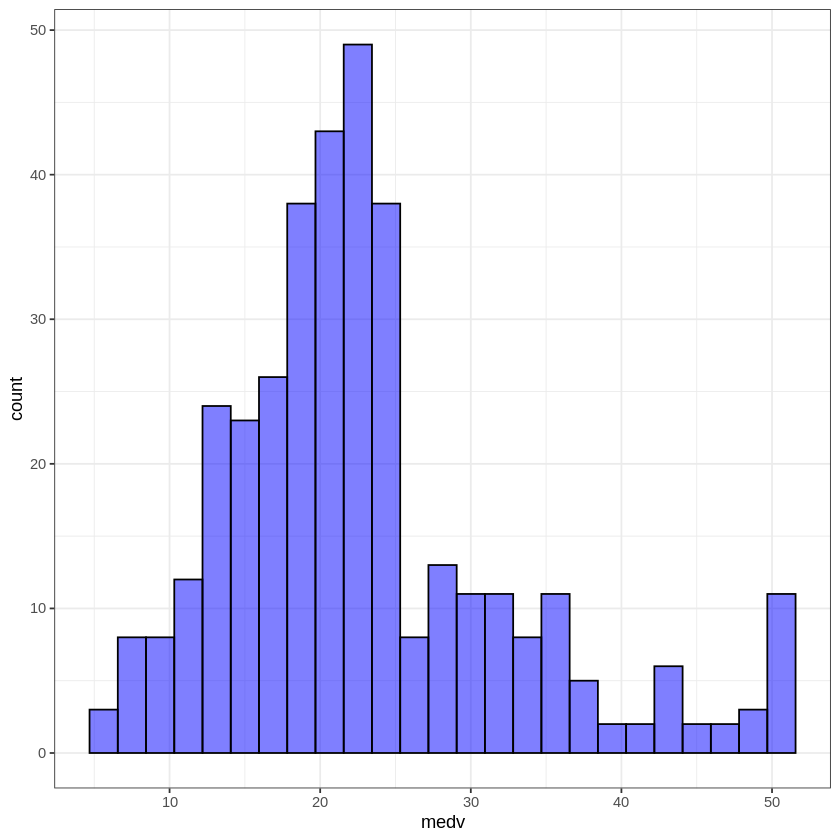

In [46]:
# train
ggplot(train_data, aes(medv)) + 
    geom_histogram(bins = 25, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

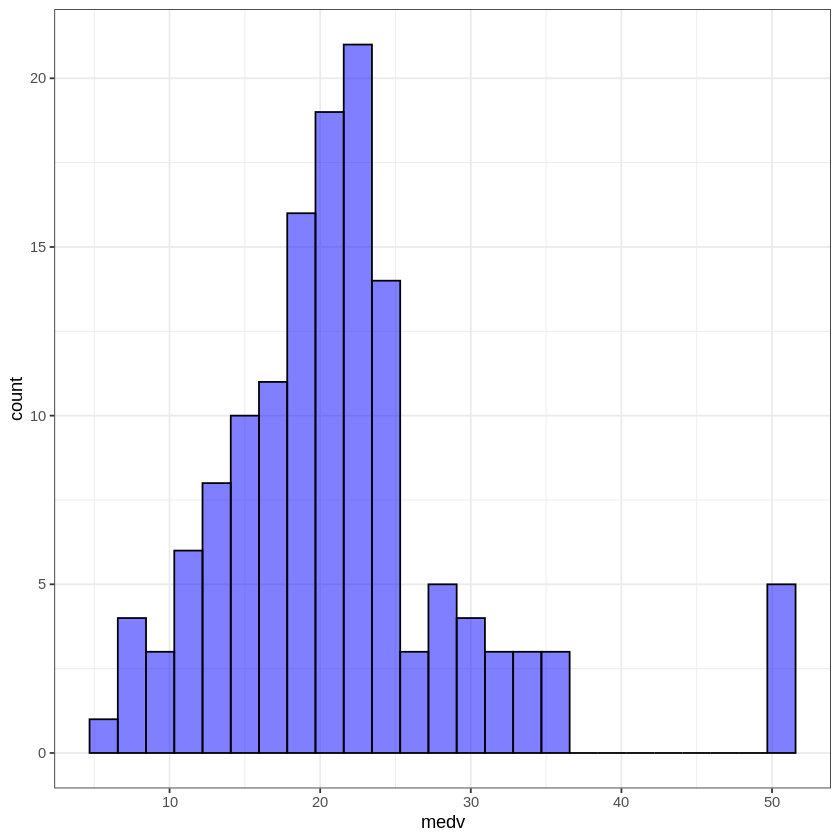

In [47]:
# test
ggplot(test_data, aes(medv)) + 
    geom_histogram(bins = 25, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

---

# 5. Baseline (Linear regression)

Для порівняння ефективності використання нейронних мереж скористаємося для початку лінійною регресією:

In [13]:
lm_model <- lm(medv ~ ., data = train_data)
summary(lm_model)


Call:
lm(formula = medv ~ ., data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.32496 -0.06311 -0.01192  0.04336  0.56005 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.49146    0.06574   7.476 6.11e-13 ***
crim        -0.17348    0.12783  -1.357 0.175608    
zn           0.10752    0.03685   2.918 0.003751 ** 
indus        0.03863    0.04814   0.803 0.422761    
chas         0.04662    0.02281   2.044 0.041736 *  
nox         -0.25082    0.05347  -4.691 3.90e-06 ***
rm           0.42499    0.05800   7.327 1.61e-12 ***
age          0.02782    0.03472   0.801 0.423446    
dis         -0.36673    0.05921  -6.194 1.64e-09 ***
rad          0.16375    0.04390   3.730 0.000223 ***
tax         -0.15722    0.05508  -2.854 0.004568 ** 
ptratio     -0.19328    0.03430  -5.635 3.58e-08 ***
black        0.08439    0.03129   2.697 0.007328 ** 
lstat       -0.45956    0.05013  -9.168  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**

Здійснимо прогноз тестових значень:

In [14]:
test_lm_predicted_scaled <- predict(lm_model, test_data)
head(test_lm_predicted_scaled)

4         5        10        11        20        21 
0.5307311 0.5153752 0.3090266 0.3086393 0.3031652 0.1709297

Let's check errors and R^2:

In [15]:
library(modelr)
# need for next comparison
linear_err <- data.frame(
  R2_test = rsquare(lm_model, data = test_data),
  R2_train = rsquare(lm_model, data = train_data),
  MSE = mse(lm_model, data = test_data),
  RMSE = rmse(lm_model, data = test_data)  
)
linear_err 

R2_test,R2_train,MSE,RMSE
<dbl>,<dbl>,<dbl>,<dbl>
0.768679,0.7269745,0.007872404,0.08872657


---

# 6. Побудова нейромережі за допомогою `neuralnet`

Підключаємо пакет neuralnet:

In [53]:
install.packages("neuralnet")

also installing the dependency ‘Deriv’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [16]:
library(neuralnet)


Attaching package: ‘neuralnet’


The following object is masked from ‘package:dplyr’:

    compute




Для побудови моделі потрібно згенерувати формулу у форматі $y ~ x_1 + x_2 + ... + x_n$

In [17]:
n <- colnames(data)
n <- n[!n %in% "medv"]
formula <- as.formula(paste("medv ~", paste(n, collapse = " + ")))
formula

medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + 
    tax + ptratio + black + lstat

Будуємо модель за допомогою фунуції `neuralnet()`:

`hidden = c(3,4)` - перший прихований шар буде мати 3 нейрони, другий 4
`linear.output` - вихідний показник неперервне число. Не класифікація

In [18]:
nn_model <- neuralnet(formula = formula, data = train_data, hidden = c(3,4), linear.output = TRUE, rep = 1)

Візуалізуємо модель:

In [19]:
plot(nn_model)

In [20]:
train_data %>% head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.0000000000,0.180,0.06781525,0,0.3148148,0.5775053,0.6416066,0.2692031,0.00000000,0.20801527,0.2872340,1.0000000,0.08967991,0.4222222
2,0.0002359225,0.000,0.24230205,0,0.1728395,0.5479977,0.7826982,0.3489620,0.04347826,0.10496183,0.5531915,1.0000000,0.20447020,0.3688889
3,0.0002356977,0.000,0.24230205,0,0.1728395,0.6943859,0.5993821,0.3489620,0.04347826,0.10496183,0.5531915,0.9897373,0.06346578,0.6600000
6,0.0002644715,0.000,0.06304985,0,0.1502058,0.5497222,0.5746653,0.4485446,0.08695652,0.06679389,0.6489362,0.9929901,0.09602649,0.5266667
7,0.0009213230,0.125,0.27162757,0,0.2860082,0.4696302,0.6560247,0.4029226,0.17391304,0.23664122,0.2765957,0.9967220,0.29525386,0.3977778
8,0.0015536719,0.125,0.27162757,0,0.2860082,0.5002874,0.9598352,0.4383872,0.17391304,0.23664122,0.2765957,1.0000000,0.48068433,0.4911111


Також для візуалізація можна скористатися функцією `plot.nnet()`, опубілкованою на відкритому ресурсі одним із користувачів мережі Інтернет:

In [23]:
library(devtools)
install.packages("clusterGeneration")

Loading required package: usethis

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [67]:
library(clusterGeneration)

In [68]:
source_url('https://gist.githubusercontent.com/fawda123/7471137/raw/466c1474d0a505ff044412703516c34f1a4684a5/nnet_plot_update.r')

ℹ SHA-1 hash of file is 74c80bd5ddbc17ab3ae5ece9c0ed9beb612e87ef



In [69]:
plot.nnet(nn_model)

Loading required package: scales

Warning message:
“package ‘scales’ was built under R version 4.0.5”
Loading required package: reshape

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘reshape’”


ERROR: Error in data.frame(wts, row.nms): arguments imply differing number of rows: 0, 14


Preview neural network matrix as text:

In [22]:
nn_model$result.matrix %>% head()

error,5.484041e-01
reached.threshold,9.298425e-03
steps,5.220000e+03
Intercept.to.1layhid1,-2.718862e+00
crim.to.1layhid1,-5.317584e+00
zn.to.1layhid1,6.278400e-01


Здійснимо прогноз для тестової вибірки та повернемо значення до базового виміру:

In [24]:
test_predicted_scaled <- compute(nn_model, test_data%>%select(-medv))

Convert `$net.result` to original form:

In [26]:
test_nn_predicted <- test_predicted_scaled$net.result * (max(data$medv) - min(data$medv)) + min(data$medv)
head(test_nn_predicted)

4,33.07236
5,30.08621
10,20.07867
11,20.51314
20,18.94824
21,15.61543


Порівняємо похибки та $R^2$ по лінійній регресії та першій нейронній мережі:

In [28]:
head(test_data)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,0.0002927957,0.000,0.06304985,0,0.1502058,0.6585553,0.4418126,0.4485446,0.08695652,0.06679389,0.6489362,0.9942761,0.03338852,0.6311111
5,0.0007050701,0.000,0.06304985,0,0.1502058,0.6871048,0.5283213,0.4485446,0.08695652,0.06679389,0.6489362,1.0000000,0.09933775,0.6933333
10,0.0018401733,0.125,0.27162757,0,0.2860082,0.4680973,0.8547889,0.4967309,0.17391304,0.23664122,0.2765957,0.9743053,0.42411700,0.3088889
11,0.0024566741,0.125,0.27162757,0,0.2860082,0.5395670,0.9412976,0.4744155,0.17391304,0.23664122,0.2765957,0.9889556,0.51655629,0.2222222
20,0.0080867817,0.000,0.28152493,0,0.3148148,0.4150220,0.6858908,0.2425138,0.13043478,0.22900763,0.8936170,0.9849967,0.26352097,0.2933333
21,0.0139987825,0.000,0.28152493,0,0.3148148,0.3849396,0.9804325,0.2426411,0.13043478,0.22900763,0.8936170,0.9487367,0.53228477,0.1911111


In [31]:
library(Metrics) # for rmse function
neural_err <- data.frame(
  R2 = cor(test_data$medv, test_predicted_scaled$net.result) ^ 2,
  MSE = mse(test_data$medv, test_predicted_scaled$net.result),
  RMSE = rmse(test_data$medv, test_predicted_scaled$net.result)  
)

linear_err 
neural_err 

# Model is much better by all metrics

R2_test,R2_train,MSE,RMSE
<dbl>,<dbl>,<dbl>,<dbl>
0.768679,0.7269745,0.007872404,0.08872657


R2,MSE,RMSE
<dbl>,<dbl>,<dbl>
0.8361475,0.006059023,0.07783972


---

# 7. Neural network with `nnet`

Підключаємо пакет `nnet` для побудови нейромережі із `2-vf` прихованими шарами, для прикладу:

In [32]:
install.packages("nnet")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



Підключаємо пакет nnet для побудови нейромережі із 1 прихованим шаром:

In [33]:
library(nnet)

Будуємо модель на основі формули створеної для попередньої моделі:

* `size` - кількість нейронів у прихованому шарі

In [36]:
nnet_model <- nnet(formula, data = train_data, size = 2, maxit = 100)

# weights:  31
initial  value 22.855160 
iter  10 value 4.471876
iter  20 value 2.881202
iter  30 value 2.507910
iter  40 value 2.316135
iter  50 value 2.208636
iter  60 value 2.100356
iter  70 value 2.057365
iter  80 value 1.981133
iter  90 value 1.943740
iter 100 value 1.931933
final  value 1.931933 
stopped after 100 iterations


In [37]:
summary(nnet_model)

a 13-2-1 network with 31 weights
options were -
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1  i5->h1  i6->h1  i7->h1  i8->h1  i9->h1 
  11.73   -3.21    7.52   -2.05    0.81   -3.96   -7.00    1.35   -5.51   -0.67 
i10->h1 i11->h1 i12->h1 i13->h1 
  -3.68   -1.24    0.11   -1.26 
  b->h2  i1->h2  i2->h2  i3->h2  i4->h2  i5->h2  i6->h2  i7->h2  i8->h2  i9->h2 
   5.28    0.52   -0.21   -0.80    0.18   -0.93   -7.12    0.60    1.00   -3.22 
i10->h2 i11->h2 i12->h2 i13->h2 
  -0.19    0.24   -0.08    4.62 
 b->o h1->o h2->o 
-0.53  4.17 -4.44 

Візуалізуємо модель:

In [39]:
plot.nnet(nnet_model)

ERROR: Error in xy.coords(x, y, xlabel, ylabel, log): 'x' is a list, but does not have components 'x' and 'y'


Здійснимо прогноз для тестової вибірки та повернемо значення до базового виміру:

In [40]:
test_predicted_scaled <- predict(nnet_model, test_data)
head(test_predicted_scaled)
test_nnet_predicted <- test_predicted_scaled * (max_out - min_out) + min_out

4,0.5540159
5,0.5172959
10,0.3178907
11,0.3138990
20,0.3285256
21,0.3051598


ERROR: Error in eval(expr, envir, enclos): object 'max_out' not found


Порівняємо похибки по лінійній регресії та нейронних мереж:

In [41]:
nnet_err <- data.frame(
  R2 = cor(test_data$medv, test_predicted_scaled) ^ 2,
  MSE = mse(test_data$medv, test_predicted_scaled),
  RMSE = rmse(test_data$medv, test_predicted_scaled)  
)

linear_err 
neural_err 
nnet_err

# neuralnet wins! but remember it has more layers

R2_test,R2_train,MSE,RMSE
<dbl>,<dbl>,<dbl>,<dbl>
0.768679,0.7269745,0.007872404,0.08872657


R2,MSE,RMSE
<dbl>,<dbl>,<dbl>
0.8361475,0.006059023,0.07783972


R2,MSE,RMSE
<dbl>,<dbl>,<dbl>
0.8114978,0.006530041,0.08080867


---

# 8. Final models compare

Побудуємо графік розподілу пронозованих значень показників по усх моделях:

In [43]:
#Однакові межі для усіх графіків по Y
plot_ylim <- c(0,50)

par(mfrow=c(1,3)) # три стовпці, 1 рядок
# pch  - тип точки для графіку
plot(test_medv, test_lm_predicted, col='black', ylim=plot_ylim, main='Real vs predicted LM', pch=25, cex=0.7)
abline(0,1,lwd=2)
legend('bottomright',legend='LM',pch=25,col='black', bty='n')

plot(test_medv,test_nn_predicted, col='red', ylim=plot_ylim, main='Real vs predicted NN',pch=18,cex=0.7)
abline(0,1,lwd=2)
legend('bottomright',legend='NN',pch=18,col='red', bty='n')

plot(test_medv,test_nnet_predicted, col='blue', ylim=plot_ylim, main='Real vs predicted NNET',pch=18,cex=0.7)
abline(0,1,lwd=2)

legend('bottomright',legend='NNET',pch=18, col='black', bty='n')


ERROR: Error in plot(test_medv, test_lm_predicted, col = "black", ylim = plot_ylim, : object 'test_medv' not found


Combine all to one chart:

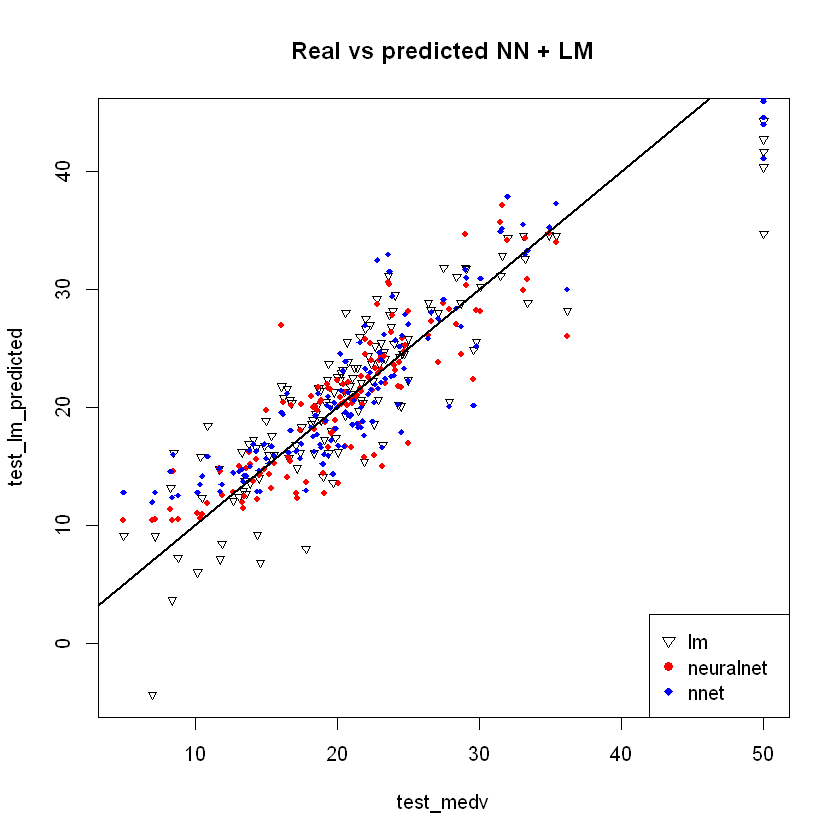

In [202]:
par(mfrow=c(1,1))

plot(test_medv,test_lm_predicted,col='black',main='Real vs predicted NN + LM',pch=25,cex=0.7)
points(test_medv,test_nn_predicted,col='red',pch=19,cex=0.7)
points(test_medv,test_nnet_predicted,col='blue',pch=18,cex=0.7)
abline(0,1,lwd=2)
legend('bottomright',legend=c('lm','neuralnet','nnet'),pch=c(25,19,18),col=c('black', 'red','blue'))

---

# References

1. Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

2. Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.
